In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import kagglehub

****DOWNLOAD THE DATASET****

In [2]:
# Download latest version
path = kagglehub.dataset_download("sujithmandala/simple-rainfall-classification-dataset")
print("Path to dataset files:", path)

100%|██████████| 804/804 [00:00<00:00, 402kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sujithmandala/simple-rainfall-classification-dataset/versions/1


**LOAD THE DATASET**

In [3]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("sujithmandala/simple-rainfall-classification-dataset")
print("Path to dataset files:", path)

# Look inside the folder to find the CSV file
import os

# List files to find the actual CSV
files = os.listdir(path)
print("Files in dataset folder:", files)

# Assuming the file is named something like 'rainfall.csv'
csv_file = [f for f in files if f.endswith('.csv')][0]  # pick the first CSV
csv_path = os.path.join(path, csv_file)

# Import dataset
print("Imported dataset is: ")
dataset = pd.read_csv(csv_path)

# Remove the last row with NaN values
dataset = dataset.dropna()

# Drop the 'date' column
dataset = dataset.drop(columns=["date"])
print(dataset)
print()

# Find its shape
print("Its shape is: ")
print(dataset.shape)
print()

# Extract independent variables
print("Extracted independent values: ")
x = dataset.iloc[:, :-1].values
print(x)
print()

# Extract dependent variables
print("Extracted dependent values: ")
y = dataset.iloc[:, -1].values
print(y)


Path to dataset files: /kaggle/input/simple-rainfall-classification-dataset
Files in dataset folder: ['rainfall.csv']
Imported dataset is: 
    rainfall  temperature  humidity  wind_speed weather_condition
0       12.5         15.2      78.0         8.5             Rainy
1        8.2         17.8      65.0         5.2             Rainy
2        0.0         20.1      52.0         3.1             Sunny
3        3.7         18.6      71.0         6.7             Rainy
4       21.1         14.8      82.0         9.3             Rainy
5       15.3         16.5      75.0         7.8             Rainy
6        6.8         19.2      61.0         4.5             Rainy
7        0.0         21.7      48.0         2.9             Sunny
8       11.2         17.3      73.0         6.1             Rainy
9       18.6         15.8      79.0         8.9             Rainy
10       9.5         16.2      72.0         5.7             Rainy
11       2.1         19.8      58.0         3.5             Rainy
12

**DATA PREPROCESSING**

In [4]:
#import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)
print(y)

[0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)

[[11.2 17.3 73.   6.1]
 [ 0.  22.9 47.   2.5]
 [ 6.8 19.2 61.   4.5]
 [17.9 16.7 77.   6.2]
 [21.1 14.8 82.   9.3]
 [ 5.8 17.8 72.   6.9]
 [18.4 17.1 76.   6.8]
 [20.5 15.6 81.   8.2]
 [ 9.1 15.4 81.   8.9]
 [17.3 15.9 83.   8.6]
 [19.2 16.8 77.   7.2]
 [18.6 15.8 79.   8.9]
 [ 5.6 18.5 63.   4.9]
 [11.6 19.1 65.   5.1]
 [ 0.  22.1 49.   2.7]
 [ 9.8 19.7 62.   4.7]
 [ 2.1 19.8 58.   3.5]
 [12.5 15.2 78.   8.5]
 [ 0.  22.7 51.   4.5]
 [ 6.2 18.5 70.   7.3]
 [ 0.  21.6 53.   3.7]
 [19.6 16.2 79.   7.8]
 [21.8 16.4 78.   7.6]
 [ 8.3 19.2 68.   6.1]
 [ 8.2 17.8 65.   5.2]
 [ 0.  19.4 59.   4.1]
 [ 0.  20.1 52.   3.1]
 [10.4 19.5 66.   5.5]
 [ 7.5 18.9 64.   4.3]
 [12.7 15.7 79.   8.3]
 [11.9 14.1 89.  10.5]
 [ 9.5 16.2 72.   5.7]
 [ 7.1 18.2 67.   7.1]
 [10.8 17.6 75.   6.7]
 [ 7.4 16.8 77.   8.9]
 [ 3.9 16.1 71.   5.3]
 [ 0.  21.7 48.   2.9]
 [ 6.7 18.1 74.   7.7]
 [14.9 15.1 81.   8.7]
 [15.5 14.2 83.   9.5]
 [ 0.  21.3 55.   5.1]
 [13.2 14.7 85.   9.3]]

[[16.3 14.5 84.   9.1]
 [ 0.  23

**DATA STANDARDIZATION**

In [6]:
#import standardscaler for independent variables
standardscaler=StandardScaler()
x_train=standardscaler.fit_transform(x_train)
x_test=standardscaler.transform(x_test)
print(x_train)
print()
print(x_test)
print()
print(y_train)
print()
print(y_test)

[[ 0.23885559 -0.23473222  0.29982564 -0.13720203]
 [-1.43064919  2.14496686 -2.02222824 -1.83760758]
 [-0.41702128  0.57266568 -0.77189154 -0.89293783]
 [ 1.2375772  -0.48969998  0.6570647  -0.08996855]
 [ 1.71457857 -1.29709788  1.10361352  1.37426956]
 [-0.56608421 -0.02225909  0.21051587  0.24066586]
 [ 1.31210867 -0.31972148  0.56775493  0.19343238]
 [ 1.62514081 -0.95714087  1.01430376  0.8547012 ]
 [-0.07417655 -1.04213013  1.01430376  1.18533561]
 [ 1.14813945 -0.82965699  1.19292329  1.04363515]
 [ 1.43135901 -0.44720535  0.6570647   0.38236633]
 [ 1.34192125 -0.87215162  0.83568423  1.18533561]
 [-0.5958968   0.2752033  -0.59327201 -0.70400388]
 [ 0.29848077  0.53017105 -0.41465248 -0.60953691]
 [-1.43064919  1.80500985 -1.84360872 -1.74314061]
 [ 0.0301675   0.78513881 -0.68258177 -0.79847086]
 [-1.11761704  0.82763344 -1.03982083 -1.36527271]
 [ 0.4326374  -1.12711938  0.74637446  0.99640166]
 [-1.43064919  2.05997761 -1.66498919 -0.89293783]
 [-0.50645904  0.2752033   0.03

**IMPLEMENTATION OF KNN CLASSIFIER**

In [8]:
#train and predict knn classifier
import seaborn as sns
knnclassifier=KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
ypred=knnclassifier.predict(x_test)
#evaluate the classifier
print("Confusion Matrix: ")
cm=confusion_matrix(y_test,ypred)
print(cm)
print("Classification report",metrics.classification_report(y_test,ypred))
print("accuracy score",accuracy_score(y_test,ypred))

Confusion Matrix: 
[[8 0]
 [0 3]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

accuracy score 1.0


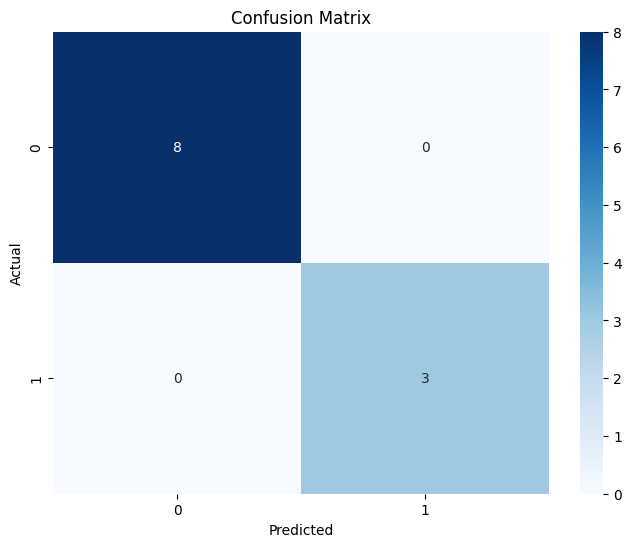

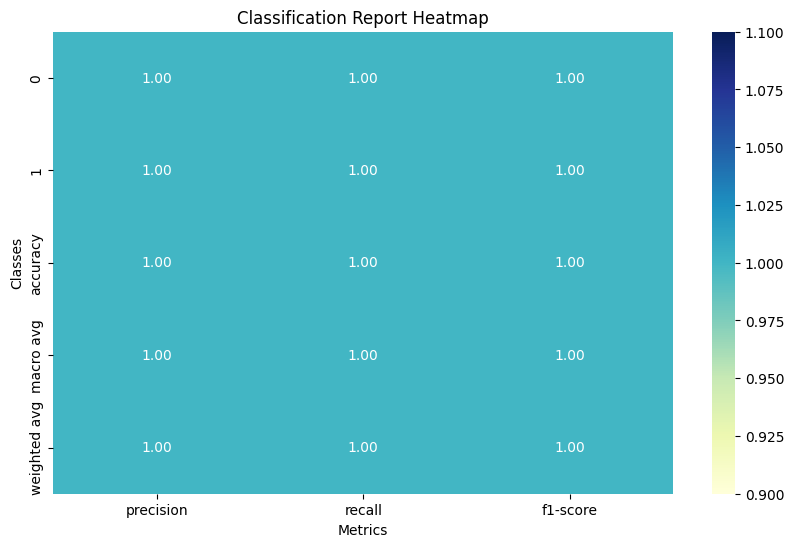

Accuracy Score: 1.0


In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knnclassifier.classes_, yticklabels=knnclassifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report Heatmap
report = classification_report(y_test, ypred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Remove 'accuracy' row for clarity

plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()

# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, ypred))

In [12]:
#take input from the user for prediction
s1=float(input("Enter Rainfall: "))
s2=float(input("Enter Temperature: "))
s3=float(input("Enter Humidity: "))
s4=float(input("Enter windspeed: "))
new=np.array([[s1,s2,s3,s4]])
new=standardscaler.transform(new)
pre=knnclassifier.predict(new)
prewea = labelencoder.inverse_transform(pre)
print("Predicted class: ",prewea[0])

Enter Rainfall: 0
Enter Temperature: 20.1
Enter Humidity: 52
Enter windspeed: 3.1
Predicted class:  Sunny


**IMPLEMETATION OF LOGISTIC REGRESSION**

In [13]:
#train and predict logistic regression
from sklearn.linear_model import LogisticRegression
logisticregression=LogisticRegression()
logisticregression.fit(x_train,y_train)
ypred=logisticregression.predict(x_test)
#evaluate the classifier
print("Confusion matrix: ")
cm=confusion_matrix(y_test,ypred)
print("Classification report: ",metrics.classification_report(y_test,ypred))
print("Accuracy score:",accuracy_score(y_test,ypred))

Confusion matrix: 
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy score: 1.0


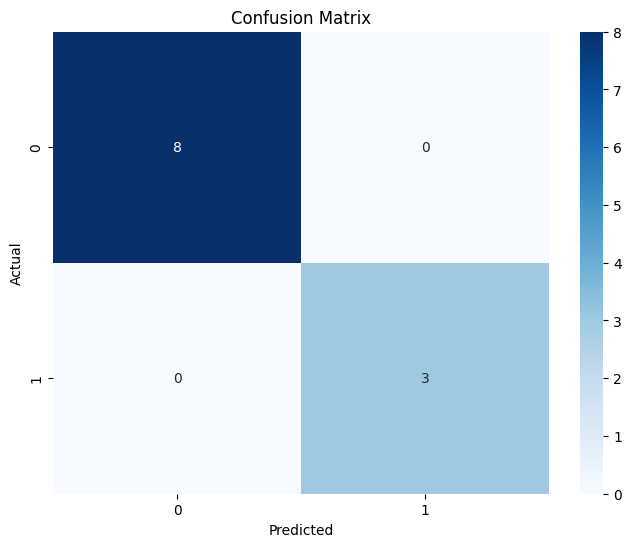

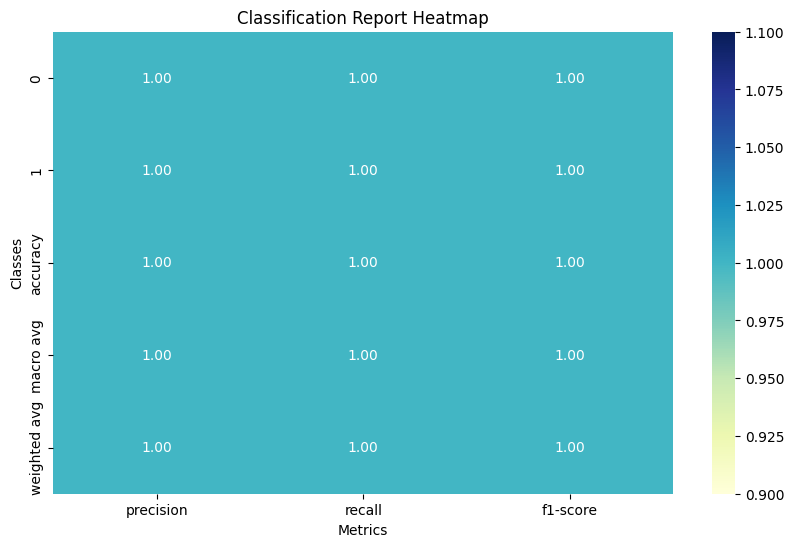

Accuracy Score: 1.0


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knnclassifier.classes_, yticklabels=knnclassifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report Heatmap
report = classification_report(y_test, ypred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Remove 'accuracy' row for clarity

plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()

# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, ypred))

In [15]:
#take input from the userforprediction
s1=float(input("EnterRainfall: "))
s2=float(input("EnterTemperature: "))
s3=float(input("EnterHumidity: "))
s4=float(input("Enterwindspeed: "))
new=np.array([[s1,s2,s3,s4]])
new=standardscaler.transform(new)
pre=logisticregression.predict(new)
prewea =labelencoder.inverse_transform(pre)
print("Predictedclass: ",prewea[0])

EnterRainfall: 15.3
EnterTemperature: 16.5
EnterHumidity: 75
Enterwindspeed: 7.8
Predictedclass:  Rainy


**IMPLEMETATION OF SVM: LINEAR KERNEL**

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
#Createand traintheSVCmodel
svcmodel= SVC(C=0.1, kernel='linear',gamma=1)
svcmodel.fit(x_train,y_train)
#Predict labels for thetestset
ypred =svcmodel.predict(x_test)
#Evaluation
print("Classification Report:")
print(classification_report(y_test,ypred))
print("AccuracyScore:",accuracy_score(y_test,ypred))
i =0
print("\n-------------------------------------------------------------------------")
print('%-25s %-25s%-25s'% ('OriginalLabel', 'PredictedLabel', 'Correct/Wrong'))
print("-------------------------------------------------------------------------")
for label in y_test:
  original_label= 'rainy' if label== 0 else'sunny'
  predicted_label= 'rainy'if ypred[i]== 0 else'sunny'
  correctness= 'Correct' if label == ypred[i] else 'Wrong'
  print('%-25s %-25s%-25s'% (original_label,predicted_label,correctness))
  i +=1
  print("-------------------------------------------------------------------------")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

AccuracyScore: 1.0

-------------------------------------------------------------------------
OriginalLabel             PredictedLabel           Correct/Wrong            
-------------------------------------------------------------------------
rainy                     rainy                    Correct                  
-------------------------------------------------------------------------
sunny                     sunny                    Correct                  
-------------------------------------------------------------------------
rainy                     rainy                    Correct                  
--------------------------

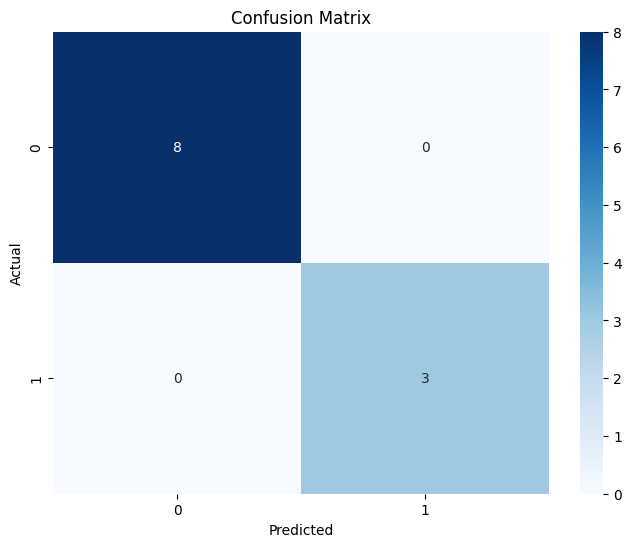

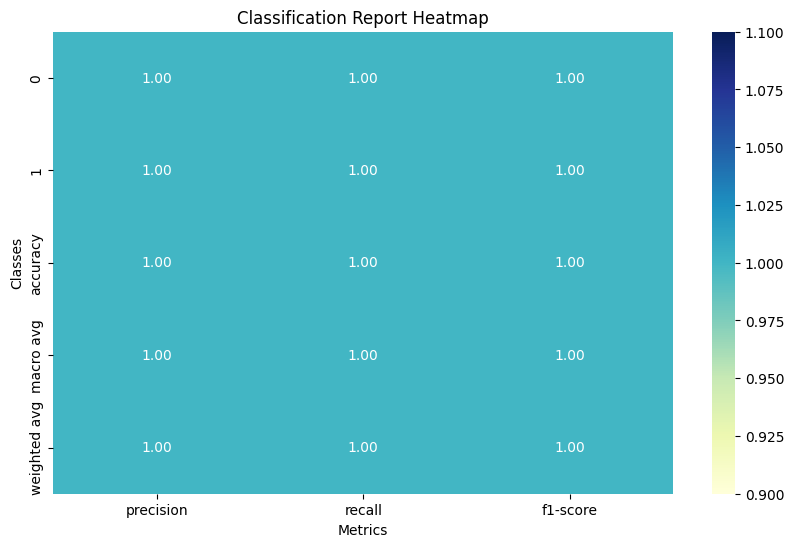

Accuracy Score: 1.0


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knnclassifier.classes_, yticklabels=knnclassifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report Heatmap
report = classification_report(y_test, ypred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Remove 'accuracy' row for clarity

plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()

# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, ypred))

In [21]:
 #take input from the userforprediction
s1=float(input("EnterRainfall: "))
s2=float(input("EnterTemperature: "))
s3=float(input("EnterHumidity: "))
s4=float(input("Enterwindspeed: "))
new=np.array([[s1,s2,s3,s4]])
new=standardscaler.transform(new)
pre=svcmodel.predict(new)
prewea = labelencoder.inverse_transform(pre)
print("Predicted class: ",prewea[0])

EnterRainfall: 0
EnterTemperature: 19.4
EnterHumidity: 59
Enterwindspeed: 4.1
Predicted class:  Sunny


 **IMPLEMENTATION OF SVM: NON KERNEL -
(RBF KERNEL)**

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
# Create and train the SVC model
svcmodel = SVC(kernel='rbf')
svcmodel.fit(x_train, y_train)
# Predict labels for the test set
ypred = svcmodel.predict(x_test)
# Evaluation
print("Classification Report:")
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
# Print predictions with "rainy" and "sunny" labels
i = 0
print("\n-------------------------------------------------------------------------")
print('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print("-------------------------------------------------------------------------")
for label in y_test:
  original_label = 'rainy' if label == 0 else 'sunny'
  predicted_label = 'rainy' if ypred[i] == 0 else 'sunny'
  correctness = 'Correct' if label == ypred[i] else 'Wrong'
  print('%-25s %-25s %-25s' % (original_label, predicted_label, correctness))
  i += 1
print("-------------------------------------------------------------------------")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy Score: 1.0

-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
rainy                     rainy                     Correct                  
sunny                     sunny                     Correct                  
rainy                     rainy                     Correct                  
sunny                     sunny                     Correct                  
rainy                     rainy                     Correct                  
rainy        

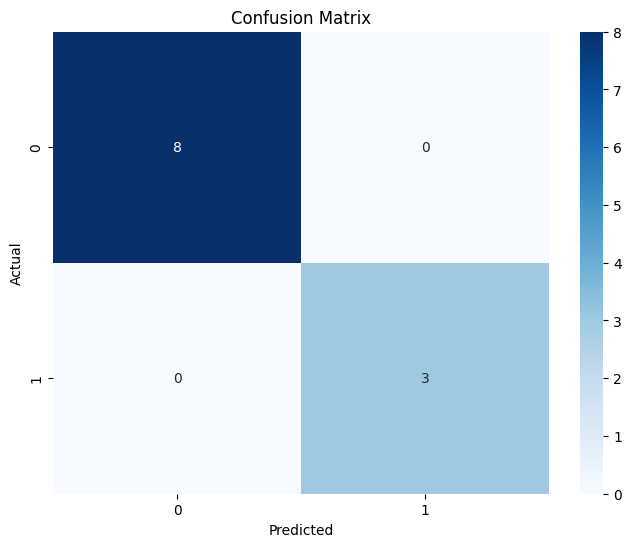

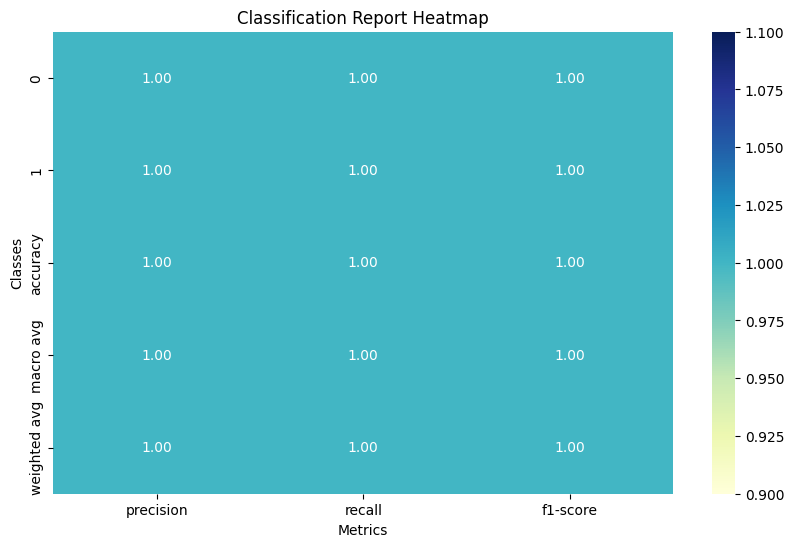

Accuracy Score: 1.0


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knnclassifier.classes_, yticklabels=knnclassifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report Heatmap
report = classification_report(y_test, ypred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Remove 'accuracy' row for clarity

plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()

# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, ypred))

In [24]:
 #take input from the userforprediction
s1=float(input("EnterRainfall: "))
s2=float(input("EnterTemperature: "))
s3=float(input("EnterHumidity: "))
s4=float(input("Enterwindspeed: "))
new=np.array([[s1,s2,s3,s4]])
new=standardscaler.transform(new)
pre=svcmodel.predict(new)
prewea =labelencoder.inverse_transform(pre)
print("Predictedclass: ",prewea[0])

EnterRainfall: 15.5
EnterTemperature: 14.2
EnterHumidity: 83
Enterwindspeed: 9.5
Predictedclass:  Rainy


**IMPLEMENTATION OF DECISION TREE**

In [25]:
from sklearn.tree import DecisionTreeClassifier
import joblib
classifier= DecisionTreeClassifier(criterion='gini', random_state=0)
fitd=classifier.fit(x_train, y_train)
joblib.dump(classifier, 'rainfall_model.pkl')
joblib.dump(standardscaler, 'scaler.pkl')
joblib.dump(labelencoder, 'labelencoder.pkl')

ypred= classifier.predict(x_test)
#evaluating the performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,y_test)
print("Confusion Matrix: ",cm)
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,ypred)
print("Accuracy Score: ",ac)
from sklearn.metrics import classification_report
cr=classification_report(y_test,ypred)
print("Classification report: ",cr)
fn=['rainfall','temperature','humidity','windspeed']
cn=['Rainy','Sunny']

Confusion Matrix:  [[8 0]
 [0 3]]
Accuracy Score:  1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



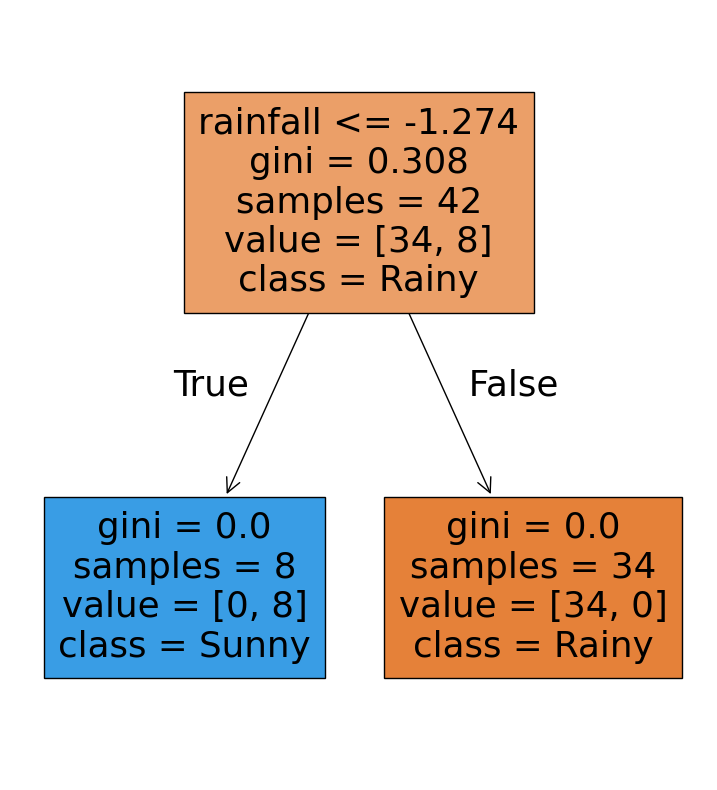

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,10))
tree.plot_tree(classifier, feature_names=fn, class_names=cn,filled=True)
fig.savefig('a.png')

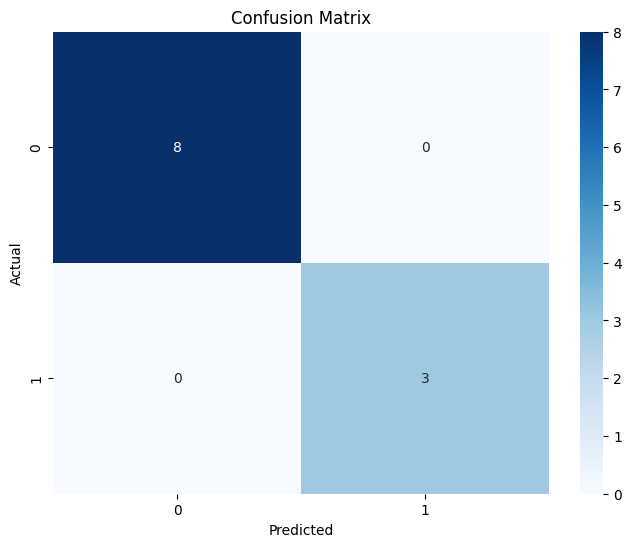

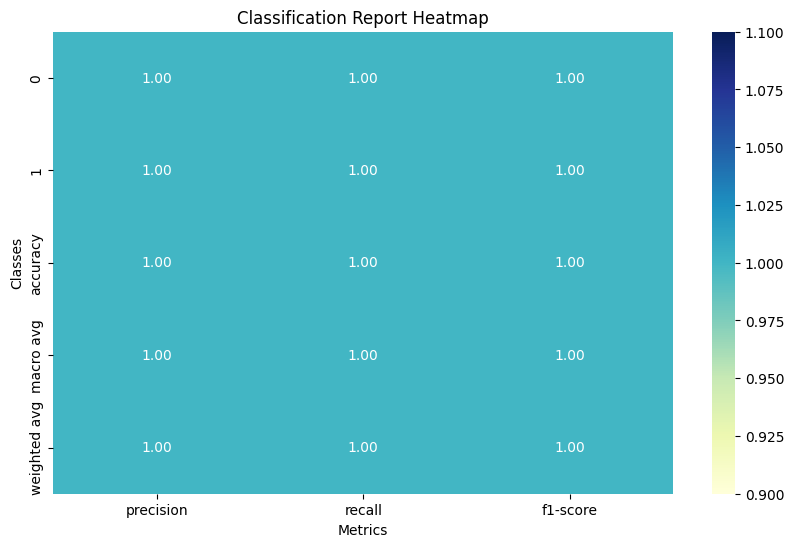

Accuracy Score: 1.0


In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knnclassifier.classes_, yticklabels=knnclassifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report Heatmap
report = classification_report(y_test, ypred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Remove 'accuracy' row for clarity

plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()

# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, ypred))

In [29]:
#take input from the user for prediction
s1=float(input("Enter Rainfall: "))
s2=float(input("Enter Temperature: "))
s3=float(input("Enter Humidity: "))
s4=float(input("Enter windspeed: "))
new=np.array([[s1,s2,s3,s4]])
new=standardscaler.transform(new)
pre=classifier.predict(new)
prewea = labelencoder.inverse_transform(pre)
print("Predicted class: ",prewea[0])

Enter Rainfall: 18.4
Enter Temperature: 17.1
Enter Humidity: 76
Enter windspeed: 6.8
Predicted class:  Rainy


In [ ]:
from google.colab import files

files.download('rainfall_model.pkl')
files.download('scaler.pkl')
files.download('labelencoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>